In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
#Predicting how worse the diabetes will get within the next year
# Load the diabetes dataset

diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)


In [3]:
alpha= 0.2
epochs=2000

In [4]:
X=pd.DataFrame.from_records(diabetes_X)

In [5]:
# Hypothesis function 
def h(theta_0, thetas, x):
    return theta_0 + np.dot(thetas, x)

In [6]:
#Cost function 

def Cost_Function(theta_0, thetas, m):
    tmp=0
    for i in range(0,m):
        tmp+=np.square((h(theta_0, thetas, X.iloc[i])-diabetes_y[i]))
    
    return (1/(2*m))*tmp 
    

In [7]:
def DerivativeJ(theta_0, thetas, m, j):
    tmp=0
    for i in range(0,m):
        tmp+=(h(theta_0, thetas, X.iloc[i])-diabetes_y[i])*X.iloc[i,j]
    
    return alpha*(1/(m))*tmp 

In [8]:
def Gradient_Decent (theta_0, thetas):
    theta_0 = theta_0 - DerivativeJ(theta_0, thetas, len(X), 0)
    for j in range(len(thetas)):
        thetas[j] = thetas[j] - DerivativeJ(theta_0, thetas, len(X), j)
    return theta_0, thetas

In [9]:
# Mean normalization 
# avg=np.mean(diabetes_y)
# std=np.std (diabetes_y)
# for i in range(len(diabetes_y)):
#     diabetes_y[i] =  (diabetes_y[i] - avg)/std

In [ ]:
theta_0= np.array([1])
thetas = np.random.uniform (-1,1,10)

for x in range (epochs):
    theta_0, thetas = Gradient_Decent(theta_0, thetas)
    print (Cost_Function(theta_0, thetas, len(X)))


In [11]:
predict = []
for x in range (100):
    predict.append(h(theta_0, thetas, X.iloc[x]))

In [12]:
real = diabetes_y [0:100]

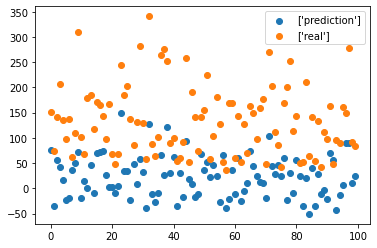

In [13]:
plt.scatter(np.arange(100), predict, label=["prediction"])
plt.scatter(np.arange(100), real, label = ["real"])
plt.legend()

In [ ]:
h(theta_0, thetas, X.iloc[100])

In [ ]:
diabetes_y[100]